# Python Fundamentos Para Análise de Dados 3.0
## Deep Learning

# <font color='blue'>Data Science Academy - Python Fundamentos - Capítulo 12</font>

## Mini-Projeto 4 - Inteligência Artificial na Agricultura 

**ATENÇÃO**

Este Mini-Projeto é um bônus com nível intermediário/avançado e o que apresentaremos aqui é apenas uma demonstração. Os conceitos necessários para executar este Mini-Projeto são estudados em detalhes na <a href="https://www.datascienceacademy.com.br/bundle/formacao-inteligencia-artificial">Formação Inteligência Artificial</a> e <a href="https://www.datascienceacademy.com.br/bundle/formacao-inteligencia-artificial-aplicada-a-medicina">Formação Inteligência Artificial Aplicada à Medicina</a> aqui na DSA.

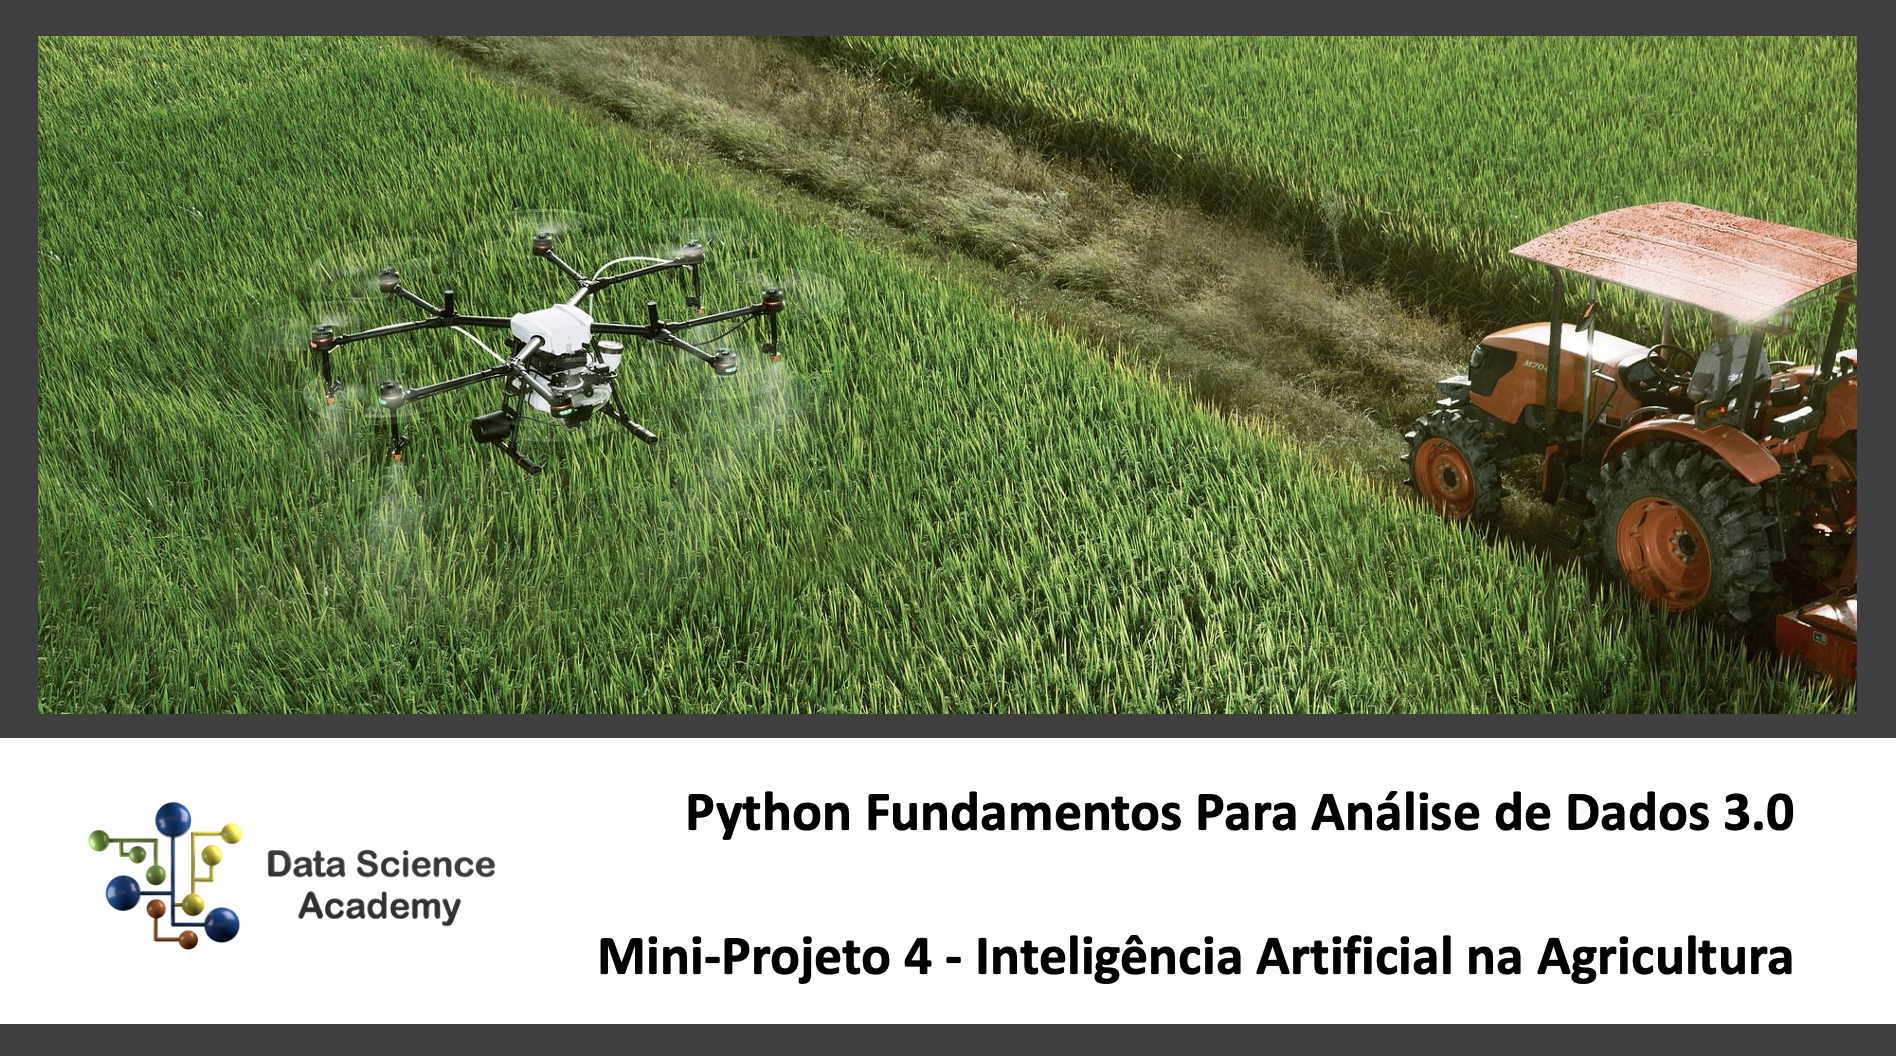

In [162]:
from IPython.display import Image
Image(r'C:\Users\Daniel\Documents\Arquivos Técnicos\Arquivos\Programação\Cursos\Introdução ao Python - DSA\PythonFundamentos-master\Cap12\imagens\mini-projeto4.png')

## Definição do Problema

Acesse o manual em pdf no Capítulo 12 do curso.

## Fonte de Dados

Acesse o manual em pdf no Capítulo 12 do curso.

## Instalando e Carregando Pacotes

In [ ]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

In [175]:
# Instala o TensorFlow
!pip install -q tensorflow

In [176]:
# Imports
import sklearn # Scikit-Learn
import numpy as np # Biblioteca para computação matemática em Python
import tensorflow as tf # Framework para construir modelos de deep learning
import matplotlib.pyplot as plt # Imprimir imagens
from pathlib import Path # Coeltar o caminho das imagens
from sklearn.preprocessing import LabelEncoder # Encoding dos labels
from sklearn.model_selection import train_test_split # Função para fazer divisão em dados de treino e teste
from tensorflow.keras.layers.experimental.preprocessing import RandomFlip
from tensorflow.keras.layers.experimental.preprocessing import RandomRotation
from tensorflow.keras.layers.experimental.preprocessing import RandomZoom
from tensorflow.keras.applications import EfficientNetB3
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Precision
from tensorflow.keras.metrics import Recall

In [177]:
# Seed para reprodutibilidade - Padrão para manter o resultado da aula igual do aluno
tf.random.set_seed(4)

## Carregando os Dados (Imagens)

In [178]:
# Diretório atual
diretorio_atual = Path.cwd()
print(diretorio_atual)

C:\Users\Daniel\Documents\Arquivos Técnicos\Arquivos\Programação\Cursos\Introdução ao Python - DSA


In [189]:
# Caminho para os dados de treino
caminho_dados_treino = Path(r'C:\Users\Daniel\Documents\Arquivos Técnicos\Arquivos\Programação\Cursos\Introdução ao Python - DSA\PythonFundamentos-master\Cap12\fruits-360\Training')

In [188]:
# Caminho para os dados de teste
caminho_dados_teste = Path(r'C:\Users\Daniel\Documents\Arquivos Técnicos\Arquivos\Programação\Cursos\Introdução ao Python - DSA\PythonFundamentos-master\Cap12\fruits-360\Test')

In [190]:
# Listando o conteúdo da pasta
imagens_treino = list(caminho_dados_treino.glob("*/*"))

In [191]:
# Visualiza uma amostra da lista
imagens_treino[925:936]

[WindowsPath('C:/Users/Daniel/Documents/Arquivos Técnicos/Arquivos/Programação/Cursos/Introdução ao Python - DSA/PythonFundamentos-master/Cap12/fruits-360/Training/Apple Crimson Snow/r_90_100.jpg'),
 WindowsPath('C:/Users/Daniel/Documents/Arquivos Técnicos/Arquivos/Programação/Cursos/Introdução ao Python - DSA/PythonFundamentos-master/Cap12/fruits-360/Training/Apple Crimson Snow/r_91_100.jpg'),
 WindowsPath('C:/Users/Daniel/Documents/Arquivos Técnicos/Arquivos/Programação/Cursos/Introdução ao Python - DSA/PythonFundamentos-master/Cap12/fruits-360/Training/Apple Crimson Snow/r_92_100.jpg'),
 WindowsPath('C:/Users/Daniel/Documents/Arquivos Técnicos/Arquivos/Programação/Cursos/Introdução ao Python - DSA/PythonFundamentos-master/Cap12/fruits-360/Training/Apple Crimson Snow/r_93_100.jpg'),
 WindowsPath('C:/Users/Daniel/Documents/Arquivos Técnicos/Arquivos/Programação/Cursos/Introdução ao Python - DSA/PythonFundamentos-master/Cap12/fruits-360/Training/Apple Crimson Snow/r_94_100.jpg'),
 Wind

In [192]:
# Expressão lambda que extrai apenas o valor com o caminho de cada imagem
imagens_treino = list(map(lambda x: str(x), imagens_treino))

In [193]:
# Visualiza uma amostra da lista
imagens_treino[925:936]

['C:\\Users\\Daniel\\Documents\\Arquivos Técnicos\\Arquivos\\Programação\\Cursos\\Introdução ao Python - DSA\\PythonFundamentos-master\\Cap12\\fruits-360\\Training\\Apple Crimson Snow\\r_90_100.jpg',
 'C:\\Users\\Daniel\\Documents\\Arquivos Técnicos\\Arquivos\\Programação\\Cursos\\Introdução ao Python - DSA\\PythonFundamentos-master\\Cap12\\fruits-360\\Training\\Apple Crimson Snow\\r_91_100.jpg',
 'C:\\Users\\Daniel\\Documents\\Arquivos Técnicos\\Arquivos\\Programação\\Cursos\\Introdução ao Python - DSA\\PythonFundamentos-master\\Cap12\\fruits-360\\Training\\Apple Crimson Snow\\r_92_100.jpg',
 'C:\\Users\\Daniel\\Documents\\Arquivos Técnicos\\Arquivos\\Programação\\Cursos\\Introdução ao Python - DSA\\PythonFundamentos-master\\Cap12\\fruits-360\\Training\\Apple Crimson Snow\\r_93_100.jpg',
 'C:\\Users\\Daniel\\Documents\\Arquivos Técnicos\\Arquivos\\Programação\\Cursos\\Introdução ao Python - DSA\\PythonFundamentos-master\\Cap12\\fruits-360\\Training\\Apple Crimson Snow\\r_94_100.jpg',


In [194]:
# Total de imagens de treino
len(imagens_treino)

67692

## Pré-Processamento dos Dados

In [202]:
# Função que obtém o label de cada imagem
def extrai_label(caminho_imagem):
    return caminho_imagem.split("\\")[-2]

In [203]:
# Aplica a função
imagens_treino_labels = list(map(lambda x: extrai_label(x), imagens_treino))

In [204]:
# Visualiza uma amostra
imagens_treino_labels[840:846]

['Apple Crimson Snow',
 'Apple Crimson Snow',
 'Apple Crimson Snow',
 'Apple Crimson Snow',
 'Apple Crimson Snow',
 'Apple Crimson Snow']

> Label encoding (convertendo string para valor numérico)

In [205]:
# Cria o objeto
encoder = LabelEncoder()

In [208]:
# Aplica o fit_transform
# Transforma a string em um vaor numérico

imagens_treino_labels = encoder.fit_transform(imagens_treino_labels)

In [209]:
# Visualiza uma amostra
imagens_treino_labels[840:846]

array([1, 1, 1, 1, 1, 1], dtype=int64)

In [210]:
# Aplicamos One-Hot-Encoding nos labels
imagens_treino_labels = tf.keras.utils.to_categorical(imagens_treino_labels)

# to_categorical: Pegou a lista de labels e converteu para One-Hot-Encoding

In [211]:
# Visualiza uma amostra
imagens_treino_labels[840:846]

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.,

In [212]:
# Dividimos os dados de treino em duas amostras, treino e validação
X_treino, X_valid, y_treino, y_valid = train_test_split(imagens_treino, imagens_treino_labels)

In [213]:
X_treino[15:18]

['C:\\Users\\Daniel\\Documents\\Arquivos Técnicos\\Arquivos\\Programação\\Cursos\\Introdução ao Python - DSA\\PythonFundamentos-master\\Cap12\\fruits-360\\Training\\Peach Flat\\r_297_100.jpg',
 'C:\\Users\\Daniel\\Documents\\Arquivos Técnicos\\Arquivos\\Programação\\Cursos\\Introdução ao Python - DSA\\PythonFundamentos-master\\Cap12\\fruits-360\\Training\\Kohlrabi\\269_100.jpg',
 'C:\\Users\\Daniel\\Documents\\Arquivos Técnicos\\Arquivos\\Programação\\Cursos\\Introdução ao Python - DSA\\PythonFundamentos-master\\Cap12\\fruits-360\\Training\\Pineapple Mini\\17_100.jpg']

In [214]:
y_treino[15:18]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.,

## Dataset Augmentation

In [215]:
# Redimensionamento de todas as imagens para 224 x 224
img_size = 224
resize = tf.keras.Sequential([tf.keras.layers.experimental.preprocessing.Resizing(img_size, img_size)])

In [216]:
# Cria o objeto para dataset augmentation
data_augmentation = tf.keras.Sequential([RandomFlip("horizontal"),
                                         RandomRotation(0.2),
                                         RandomZoom(height_factor = (-0.3,-0.2)) ])

## Preparando os Dados

In [217]:
# Hiperparâmetros
batch_size = 32
autotune = tf.data.experimental.AUTOTUNE

In [218]:
# Função para carregar e transformar as imagens
def carrega_transforma(image, label):
    image = tf.io.read_file(image)
    image = tf.io.decode_jpeg(image, channels = 3)
    return image, label

In [219]:
# Função para preparar os dados noo formato do TensorFlow
def prepara_dataset(path, labels, train = True):

    # Prepara os dados
    image_paths = tf.convert_to_tensor(path)
    labels = tf.convert_to_tensor(labels)
    image_dataset = tf.data.Dataset.from_tensor_slices(image_paths)
    label_dataset = tf.data.Dataset.from_tensor_slices(labels)
    dataset = tf.data.Dataset.zip((image_dataset, label_dataset))
    dataset = dataset.map(lambda image, label: carrega_transforma(image, label)) 
    dataset = dataset.map(lambda image, label: (resize(image), label), num_parallel_calls = autotune)
    dataset = dataset.shuffle(1000)
    dataset = dataset.batch(batch_size)

    # Se train = True aplica dataset augmentation
    if train:
        dataset = dataset.map(lambda image, label: (data_augmentation(image), label), num_parallel_calls = autotune)
  
    # Se train = False repete sobre o dataset e retorna
    dataset = dataset.repeat()

    return dataset

In [220]:
# Cria o dataset de treino
dataset_treino = prepara_dataset(X_treino, y_treino)

In [221]:
# Shape
imagem, label = next(iter(dataset_treino))
print(imagem.shape)
print(label.shape)

# 32: Lote de 32 imagens (batch_size = 32)
# 224 x 224: 224 pixels de largura por 224 pixels de altura (img_size = 224)
# 3: São 3 canais de cores (RGB)

# 32: São 32 labels
# 131: Tamanho do vetor. Na pasta de training tem 131 pastas.

(32, 224, 224, 3)
(32, 131)


62


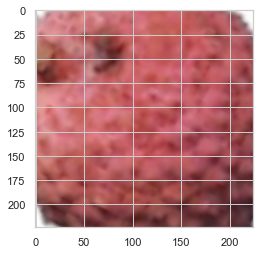

In [222]:
# Vamos visualizar uma imagem e um label
print(encoder.inverse_transform(np.argmax(label, axis = 1))[0])
plt.imshow((imagem[0].numpy()/255).reshape(224,224,3))

In [223]:
# Cria o dataset de validação
dataset_valid = prepara_dataset(X_valid, y_valid, train = False)

In [224]:
# Shape
imagem, label = next(iter(dataset_valid))
print(imagem.shape) 
print(label.shape)

(32, 224, 224, 3)
(32, 131)


## Construção do Modelo

In [226]:
# Carregando um modelo pré-treinado
modelo_pre = EfficientNetB3(input_shape = (224,224,3), include_top = False)

# EfficientNetB3: Função importa modelo pre treinado disponibilizado pelo TensorFlow

43950080/43941136 [==============================] - 8s 0us/step


In [227]:
# Adicionando nossas próprias camadas ao modelo_pre
modelo = tf.keras.Sequential([modelo_pre,
                              tf.keras.layers.GlobalAveragePooling2D(),
                              tf.keras.layers.Dense(131, activation = 'softmax')])

In [228]:
# Sumário do modelo
modelo.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb3 (Functional)  (None, 7, 7, 1536)       10783535  
                                                                 
 global_average_pooling2d (G  (None, 1536)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 131)               201347    
                                                                 
Total params: 10,984,882
Trainable params: 10,897,579
Non-trainable params: 87,303
_________________________________________________________________


In [229]:
# Hiperparâmetros
lr = 0.001
beta1 = 0.9
beta2 = 0.999
ep = 1e-07

In [230]:
# Compilação do modelo
modelo.compile(optimizer = Adam(learning_rate = lr, 
                                beta_1 = beta1, 
                                beta_2 = beta2, 
                                epsilon = ep),
               loss = 'categorical_crossentropy',
               metrics = ['accuracy', Precision(name = 'precision'), Recall(name = 'recall')])

# Adam: Função que realiza o backpropagation

> Vamos treinar o modelo por apenas uma época e verificar as métricas.

**Nota**: Se você treinar o modelo em um computador sem GPU o tempo de treinamento será bastante alto, provavelmente de muitas horas. Pratique a paciência e aguarde.

In [231]:
%%time
history = modelo.fit(dataset_treino,
                     steps_per_epoch = len(X_treino)//batch_size,
                     epochs = 1,
                     validation_data = dataset_valid,
                     validation_steps = len(y_treino)//batch_size)

   2/1586 [..............................] - ETA: 50:22:41 - loss: 4.8734 - accuracy: 0.0000e+00 - precision: 0.0000e+00 - recall: 0.0000e+00

KeyboardInterrupt: 

> Vamos treinar o modelo por mais 6 épocas a fim de melhorar a performance e aplicar algumas técnicas para evitar overfitting.

In [ ]:
# Não precisamos mais do modelo_pre
modelo.layers[0].trainable = False

In [ ]:
# Checkpoint
checkpoint = tf.keras.callbacks.ModelCheckpoint("modelo/melhor_modelo.h5", 
                                                verbose = 1, 
                                                save_best = True, 
                                                save_weights_only = True)

In [ ]:
# Early stop
early_stop = tf.keras.callbacks.EarlyStopping(patience = 4) 

In [ ]:
# Sumário
modelo.summary()

In [ ]:
%%time
history = modelo.fit(dataset_treino,
                     steps_per_epoch = len(X_treino)//batch_size,
                     epochs = 6,
                     validation_data = dataset_valid,
                     validation_steps = len(y_treino)//batch_size,
                     callbacks = [checkpoint, early_stop])

## Avaliação do Modelo

In [ ]:
# Para carregar os pesos, precisamos descongelar as camadas
modelo.layers[0].trainable = True

In [ ]:
# Carrega os pesos do ponto de verificação e reavalie
modelo.load_weights("modelo/melhor_modelo.h5")

> Carregamos os dados de teste.

In [ ]:
# Carregando e preparando os dados de teste
camninho_imagens_teste = list(caminho_dados_teste.glob("*/*"))
imagens_teste = list(map(lambda x: str(x), camninho_imagens_teste))
imagens_teste_labels = list(map(lambda x: extrai_label(x), imagens_teste))
imagens_teste_labels = encoder.fit_transform(imagens_teste_labels)
imagens_teste_labels = tf.keras.utils.to_categorical(imagens_teste_labels)
test_image_paths = tf.convert_to_tensor(imagens_teste)
test_image_labels = tf.convert_to_tensor(imagens_teste_labels)

In [ ]:
# Função para decode das imagens
def decode_imagens(image, label):
    image = tf.io.read_file(image)
    image = tf.io.decode_jpeg(image, channels = 3)
    image = tf.image.resize(image, [224,224], method = "bilinear")
    return image, label

In [ ]:
# Cria o dataset de teste
dataset_teste = (tf.data.Dataset
                 .from_tensor_slices((imagens_teste, imagens_teste_labels))
                 .map(decode_imagens)
                 .batch(batch_size))

In [ ]:
# Shape
imagem, label = next(iter(dataset_teste))
print(imagem.shape)
print(label.shape)

In [ ]:
# Visualiza uma imagem de teste
print(encoder.inverse_transform(np.argmax(label, axis = 1))[0])
plt.imshow((imagem[0].numpy()/255).reshape(224,224,3))

In [ ]:
# Avalia o modelo
loss, acc, prec, rec = modelo.evaluate(dataset_teste)

In [ ]:
print("Acurácia: ", acc)
print("Precision: ", prec)
print("Recall: ", rec)

# Performance acima de 70% de acurária é razoável/bom.

## Previsões com o Modelo Treinado

In [ ]:
# Função para carregar uma nova imagem
# A imagem de teste deve ter as mesmas configurações (shape) do modelo de treino
def carrega_nova_imagem(image_path):
    image = tf.io.read_file(image_path)
    image = tf.io.decode_jpeg(image, channels = 3)
    image = tf.image.resize(image, [224,224], method = "bilinear")
    plt.imshow(image.numpy()/255)
    image = tf.expand_dims(image, 0) 
    return image

In [ ]:
# Função para fazer previsões
def faz_previsao(image_path, model, enc):
    image = carrega_nova_imagem(image_path)
    prediction = model.predict(image)
    pred = np.argmax(prediction, axis = 1) 
    return enc.inverse_transform(pred)[0] 

In [ ]:
# Previsão
faz_previsao(r'C:\Users\Daniel\Documents\Arquivos Técnicos\Arquivos\Programação\Cursos\Introdução ao Python - DSA\PythonFundamentos-master\Cap12\imagens\imagem1.jpg', modelo, encoder)

In [ ]:
# Previsão
faz_previsao(r'C:\Users\Daniel\Documents\Arquivos Técnicos\Arquivos\Programação\Cursos\Introdução ao Python - DSA\PythonFundamentos-master\Cap12\imagens\imagem2.jpg', modelo, encoder)

In [ ]:
# Previsão
faz_previsao(r'C:\Users\Daniel\Documents\Arquivos Técnicos\Arquivos\Programação\Cursos\Introdução ao Python - DSA\PythonFundamentos-master\Cap12\imagens\imagem3.jpg', modelo, encoder)

In [ ]:
# Previsão
faz_previsao(r'C:\Users\Daniel\Documents\Arquivos Técnicos\Arquivos\Programação\Cursos\Introdução ao Python - DSA\PythonFundamentos-master\Cap12\imagens\imagem4.jpg', modelo, encoder)

In [ ]:
# Previsão
faz_previsao(r'C:\Users\Daniel\Documents\Arquivos Técnicos\Arquivos\Programação\Cursos\Introdução ao Python - DSA\PythonFundamentos-master\Cap12\imagens\imagem5.jpg', modelo, encoder)